*Integrantes*
**Samuel Prieto**,
**Alejandra Riveros**,
**Juan Andres Rojas**,
**Cristan Lopez**,
**Andres Mendivelso**




In [ ]:
#Instalaciones
!pip install spacy
!python -m spacy download en_core_web_sm
!spacy download es_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-09-12 23:26:51.688741: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2022-09-12 23:27:04.557231: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 5.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
#Importaciones para el desarrollo de código 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('all')
import pandas as pd


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to

In [ ]:
#Quitar caracteres especial del excel
text1 = "EjercicioEjemplo.xlsx"
df = pd.read_excel(text1) 


In [ ]:
#Utilizamos una expresion regular para quitar los caracteres especiales y nos coloque algo vacio
df["Texto"] = df["Texto"].str.replace(r"\W"," ")
df["Objeto"] = df["Objeto"].str.replace(r"\W"," ")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Se genera un nuevo archivo de excel sin caracteres especiales
df.to_excel("excel_limpio.xlsx")

In [ ]:
import spacy
from spacy import displacy
from spacy.lang.es.examples import sentences 
nlp = spacy.load("es_core_news_sm")
df = pd.read_excel("excel_limpio.xlsx") 
df["Texto"] = df["Texto"].str.upper()

#df["Texto"] = pd.Series(df["Texto"], dtype="string")
print(df["Texto"])

0    INFORMACIÓN DEL PROCEDIMIENTO  INFORMACIÓN ANT...
1    INFORMACIÓN DEL PROCEDIMIENTO  INFORMACIÓN DIR...
2    INFORMACIÓN DEL PROCEDIMIENTO  INFORMACIÓN SEC...
3    INFORMACIÓN DEL PROCEDIMIENTO  INFORMACIÓN RTV...
4    INFORMACIÓN DEL PROCEDIMIENTO  INFORMACIÓN SEC...
5    INFORMACIÓN DEL PROCEDIMIENTO  INFORMACIÓN SER...
6    INFORMACIÓN DEL PROCEDIMIENTO  INFORMACIÓN INV...
Name: Texto, dtype: object


In [ ]:
#nlp(df2)espera que se procese una sola cadena/documento, pero recibe una serie de cadenas panda
docs = nlp.pipe(df["Texto"])


In [ ]:
# Deteccion de identidades
displacy.render(docs, style='ent', jupyter=True)

In [ ]:
words_important = ["INTELIGENCIA", "ARTIFICIAL","ANALITICA","BIG","DATA", "MACHINE", "LEARNING"]
count_words = {k: 0 for k in words_important}

for text in df["Texto"]:

  docs = nlp(text)

  for sentence in docs.sents:
      
      for token in sentence:
        if token.text in words_important:
          count_words[token.text] += 1

print(count_words)

{'INTELIGENCIA': 4, 'ARTIFICIAL': 2, 'ANALITICA': 6, 'BIG': 3, 'DATA': 4, 'MACHINE': 2, 'LEARNING': 2}


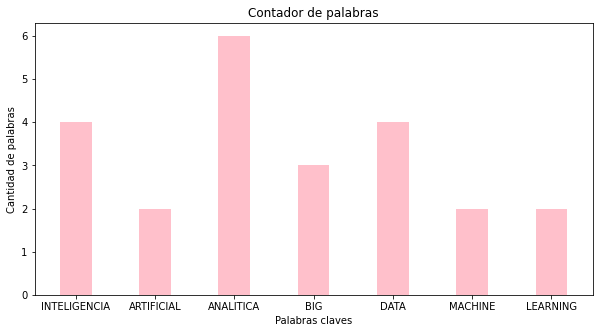

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset

words = list(count_words.keys())
values = list(count_words.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(words, values, color ='pink',
        width = 0.4)
 
plt.xlabel("Palabras claves")
plt.ylabel("Cantidad de palabras")
plt.title("Contador de palabras")
plt.show()

In [ ]:
import numpy as np 

specific_words = ["INTELIGENCIA", "ARTIFICIAL","ANALITICA","BIG DATA", "MACHINE LEARNING"]

def FindWordRatio(row):
    #ipdb.set_trace() # debugging starts here
    total_n_words = len(row["Texto"].split(' '))
    for w in specific_words:
        row['r_{}'.format(w)] = row["Texto"].count(w)/total_n_words
    return row


df = df.apply(FindWordRatio, axis = 1)



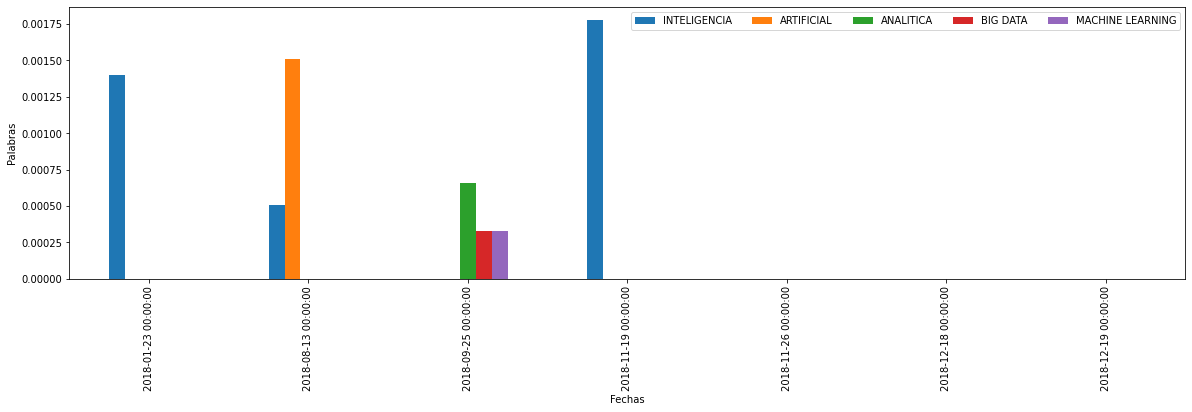

In [ ]:
important_words_df = df.pivot_table(
               index= ['Fecha'], 
               values= ['r_{}'.format(w) for w in specific_words],
               aggfunc= np.mean)

column_order = important_words_df.sum().sort_values(ascending=False).index

important_words_df[column_order].plot.bar(figsize=(20,5))

plt.legend(specific_words,ncol=7)

plt.xlabel('Fechas')
plt.ylabel('Palabras')
plt.show()

In [ ]:
#Traemos las stopwords para español, ya estan precargadas en la libreria
import nltk 
from nltk.corpus import stopwords
stop_words_sp = set(stopwords.words('spanish'))


In [ ]:
# Constants
DI_POS_TYPES = {'NN':'n', 'JJ':'a', 'VB':'v', 'RB':'r'} 
POS_TYPES = list(DI_POS_TYPES.keys())

# Constraints on tokens
MIN_STR_LEN = 3
RE_VALID = '[a-zA-Z]'

df.Texto = df.Texto.fillna('vacio', inplace=False)
text_list = df["Texto"].tolist()
print(text_list)



['INFORMACIÓN DEL PROCEDIMIENTO  INFORMACIÓN ANT PRECIO ESTIMADO TOTAL  NÚMERO DEL PROCESO TÍTULO  FASE  ESTADO   728 878 939 COP CM   003 DE 2018 INTELIGENCIA ARTIFICIAL PRESENTACIÓN DE OBSERVACIONES PUBLICADO DESARROLLAR E IMPLEMENTAR UNA HERRAMIENTA DE APRENDIZAJE AUTOMATIZADO  MACHINE LEARNING  Y O PROCESAMIENTO DEL LENGUAJE NATURAL  NATURAL LANGUAGE PROCESSING  Y O DE INTELIGENCIA DE NEGOCIO Y MINERÍA DE DATOS  QUE PERMITA DESCRIPCIÓN  CONSOLIDAR  VALIDAR Y MEJORAR LA CALIDAD DE LAS BASES DE DATOS RELACIONALES DE LA AGENCIA NACIONAL DE TIERRAS  A PARTIR DE LA REVISIÓN  CLASIFICACIÓN Y EXTRACCIÓN DE INFORMACIÓN DEL PROCESO DE TITULACIÓN DE BALDÍOS CONTENIDA EN LOS ARCHIVOS DOCUMENTALES DIGITALIZADOS DE LA ANT  TIPO DE PROCESO CONCURSO DE MÉRITOS ABIERTO  DESCONTINUADO   DATOS DEL CONTRATO TIPO DE CONTRATO DURACIÓN DEL CONTRATO  DIRECCIÓN DE EJECUCIÓN DEL CONTRATO CÓDIGO UNSPSC LISTA ADICIONAL DE CÓDIGOS UNSPSC  CONSULTORÍA 72  DÍAS  CALLE 43   57   41 BOGOTÁ DISTRITO CAPITAL DE BOG

In [ ]:
# Get stopwords, stemmer and lemmatizer
import unicodedata
import string
# Remove accents function
def remove_accents(data):
    return ''.join(x for x in unicodedata.normalize('NFKD', data) if x in string.ascii_letters or x == " ")

def remove_stopword():    
  if text in stop_words_sp:
    return ""
  return text


In [ ]:
import re
# Get stopwords, stemmer and lemmatizer
stopwords = nltk.corpus.stopwords.words('spanish')
stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()


# Process all quotes
li_tokens = []
li_token_lists = []
li_lem_strings = []

for i,text in enumerate(text_list):
    # Tokenize by sentence, then by lowercase word
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # Process all tokens per quote
    li_tokens_quote = []
    li_tokens_quote_lem = []
    for token in tokens:
        # Remove accents
        t = remove_accents(token)

        # Remove punctuation
        t = str(t).translate(string.punctuation)
        li_tokens_quote.append(t)
        
        # Add token that represents "no lemmatization match"
        li_tokens_quote_lem.append("-") # this token will be removed if a lemmatization match is found below

        # Process each token
        if t not in stopwords:
            if re.search(RE_VALID, t):
                if len(t) >= MIN_STR_LEN:
                    # Note that the POS (Part Of Speech) is necessary as input to the lemmatizer 
                    # (otherwise it assumes the word is a noun)
                    pos = nltk.pos_tag([t])[0][1][:2]
                    pos2 = 'n'  # set default to noun
                    if pos in DI_POS_TYPES:
                      pos2 = DI_POS_TYPES[pos]
                    
                    stem = stemmer.stem(t)
                    lem = lemmatizer.lemmatize(t, pos=pos2)  # lemmatize with the correct POS
                    
                    if pos in POS_TYPES:
                        li_tokens.append((t, stem, lem, pos))

                        # Remove the "-" token and append the lemmatization match
                        li_tokens_quote_lem = li_tokens_quote_lem[:-1] 
                        li_tokens_quote_lem.append(lem)

    # Build list of token lists from lemmatized tokens
    li_token_lists.append(li_tokens_quote)
    
    # Build list of strings from lemmatized tokens
    str_li_tokens_quote_lem = ' '.join(li_tokens_quote_lem)
    li_lem_strings.append(str_li_tokens_quote_lem)
    
# Build resulting dataframes from lists
df_token_lists = pd.DataFrame(li_token_lists)

print("df_token_lists.head(5):")
print(df_token_lists.head(5).to_string())

# Replace None with empty string
for c in df_token_lists:
    if str(df_token_lists[c].dtype) in ('object', 'string_', 'unicode_'):
        df_token_lists[c].fillna(value='', inplace=True)

df_lem_strings = pd.DataFrame(li_lem_strings, columns=['lem quote'])

print()
print("")
print("df_lem_strings.head():")
print(df_lem_strings.head().to_string())

df_token_lists.head(5):
          0    1              2            3           4          5              6          7         8         9        10      11      12      13       14      15       16       17             18       19       20         21            22            23            24              25              26             27           28             29             30           31           32        33            34            35         36        37            38           39             40             41        42          43             44         45          46          47             48        49            50            51             52              53           54       55          56       57           58           59          60         61              62           63           64       65              66          67             68          69             70            71           72         73        74            75           76           77             78    

In [ ]:
# Add counts
print("Group by lemmatized words, add count and sort:")
df_all_words = pd.DataFrame(li_tokens, columns=['token', 'stem', 'lem', 'pos'])
df_all_words['counts'] = df_all_words.groupby(['lem'])['lem'].transform('count')
df_all_words = df_all_words.sort_values(by=['counts', 'lem'], ascending=[False, True]).reset_index()

print("Get just the first row in each lemmatized group")
df_words = df_all_words.groupby('lem').first().sort_values(by='counts', ascending=False).reset_index()
print("df_words.head(10):")
print(df_words.head(10))

Group by lemmatized words, add count and sort:
Get just the first row in each lemmatized group
df_words.head(10):
          lem  index       token       stem pos  counts
0      anexar    647      anexar     anexar  NN     266
1  documentos    648  documentos  documento  NN     243
2    pregunta    645    pregunta   pregunta  NN     219
3      oferta    432      oferta     oferta  NN     169
4        debe    669        debe       debe  NN     157
5      bogota     83      bogota     bogota  NN     154
6    oferente    630    oferente    oferent  NN     147
7   documento    523   documento  documento  NN     147
8         utc    335         utc        utc  NN     144
9  proponente    668  proponente  proponent  NN     140


In [ ]:
df_words = df_words[['lem', 'pos', 'counts']].head(200)
for v in POS_TYPES:
    df_pos = df_words[df_words['pos'] == v]
    print()
    print("POS_TYPE:", v)
    print(df_pos.head(10).to_string())


POS_TYPE: NN
          lem pos  counts
0      anexar  NN     266
1  documentos  NN     243
2    pregunta  NN     219
3      oferta  NN     169
4        debe  NN     157
5      bogota  NN     154
6    oferente  NN     147
7   documento  NN     147
8         utc  NN     144
9  proponente  NN     140

POS_TYPE: JJ
           lem pos  counts
29     numeral  JJ      78
33    nacional  JJ      67
51       legal  JJ      42
66       total  JJ      30
72    temporal  JJ      28
78      social  JJ      26
103    general  JJ      20
130    natural  JJ      16
162   integral  JJ      13
169  adicional  JJ      12

POS_TYPE: VB
Empty DataFrame
Columns: [lem, pos, counts]
Index: []

POS_TYPE: RB
         lem pos  counts
15  requiere  RB     108


li_token_lists_flat[:10]: ['informacion', 'del', 'procedimiento', 'informacion', 'ant', 'precio', 'estimado', 'total', 'numero', 'del']
[('de', 1768), ('el', 680), ('la', 609), ('en', 522), ('del', 480), ('y', 415), ('anexar', 266), ('a', 253), ('documentos', 243), ('pregunta', 219), ('lo', 212), ('con', 181), ('oferta', 169), ('o', 166), ('debe', 157), ('no', 156), ('bogota', 154), ('por', 148), ('documento', 147), ('oferente', 147), ('utc', 144), ('proponente', 140), ('complemento', 138), ('debera', 136), ('su', 132), ('lima', 128), ('quito', 128), ('para', 126), ('pm', 119), ('los', 114), ('esta', 114), ('condiciones', 113), ('que', 112), ('estos', 109), ('requiere', 108), ('este', 98), ('contrato', 96), ('pliego', 96), ('conformidad', 95), ('proyecto', 94), ('si', 90), ('cumplir', 90), ('nota', 88), ('item', 85), ('remitirse', 84), ('requerido', 84), ('respecto', 83), ('enunciado', 82), ('denominado', 82), ('las', 78), ('numeral', 78), ('adjuntar', 78), ('fecha', 77), ('valor', 73)

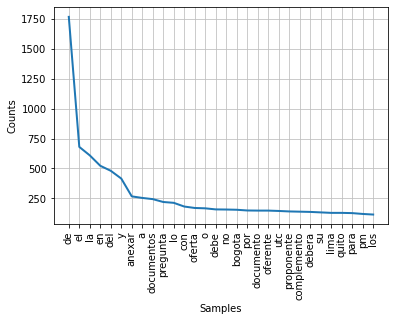

In [ ]:
li_token_lists_flat = [y for x in li_token_lists for y in x]  # flatten the list of token lists to a single list
print("li_token_lists_flat[:10]:", li_token_lists_flat[:10])

di_freq = nltk.FreqDist(li_token_lists_flat)
del di_freq['']
li_freq_sorted = sorted(di_freq.items(), key=lambda x: x[1], reverse=True)  # sorted list
print(li_freq_sorted)
    
di_freq.plot(30, cumulative=False)

[('anexar', 266), ('documentos', 243), ('pregunta', 219), ('oferta', 169), ('debe', 157), ('bogota', 154), ('documento', 147), ('oferente', 147), ('utc', 144), ('proponente', 140), ('complemento', 138), ('debera', 136), ('lima', 128), ('quito', 128), ('condiciones', 113), ('requiere', 108), ('contrato', 96), ('pliego', 96), ('conformidad', 95), ('proyecto', 94), ('cumplir', 90), ('nota', 88), ('item', 86), ('remitirse', 84), ('requerido', 84), ('respecto', 83), ('denominado', 82), ('enunciado', 82), ('adjuntar', 78), ('numeral', 78), ('fecha', 77), ('valor', 73), ('registro', 71), ('certificado', 67), ('nacional', 67), ('descargar', 65), ('cop', 63), ('publica', 63), ('invitacion', 62), ('ver', 61), ('informacion', 60), ('proceso', 58), ('servicio', 55), ('certificacion', 53), ('entidad', 47), ('pdf', 47), ('antecedentes', 46), ('precio', 45), ('formato', 43), ('legal', 42), ('tipo', 42), ('vigencia', 42), ('codigo', 41), ('informe', 40), ('presentacion', 40), ('presentar', 39), ('unic

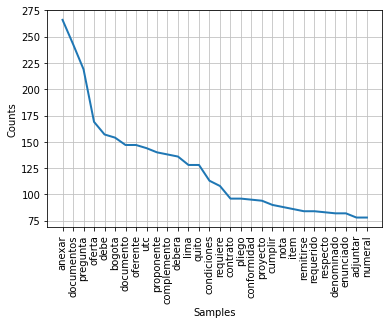

In [ ]:
li_lem_words = df_all_words['lem'].tolist()
di_freq2 = nltk.FreqDist(li_lem_words)
li_freq_sorted2 = sorted(di_freq2.items(), key=lambda x: x[1], reverse=True)  # sorted list
print(li_freq_sorted2)
    
di_freq2.plot(30, cumulative=False)

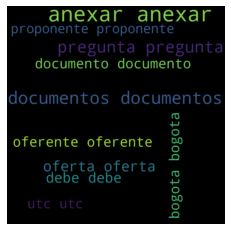

In [ ]:
from wordcloud import WordCloud 
All_Text = " ".join(li_lem_words)

wordcloud = WordCloud(width=980, height=980, max_words=10).generate(All_Text) 
  
plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show() 